In [1]:
from IPython.display import display, HTML
display(HTML("""
<style>
div.container{width:99% !important;}
div.cell.code_cell.rendered{width:100%;}
div.input_prompt{padding:0px;}
div.CodeMirror {font-family:Consolas; font-size:22pt;}
div.text_cell_render.rendered_html{font-size:18pt;}
div.text_cell_render ul li{font-size:22pt; line-height:30px;}
div.output {font-size:22pt; font-weight:bold;}
div.input {font-family:Consolas; font-size:22pt;}
div.prompt {min-width:70px;}
div#toc-wrapper{padding-top:120px;}
div.text_cell_render ul li{font-size:22pt;padding:5px;}
table.dataframe{font-size:22px;}
</style>
"""))

In [2]:
from tensorflow.keras.utils import to_categorical # 분류분석시 원핫인코딩
import pandas as pd # 원핫인코딩
from tensorflow.keras.models import Sequential, load_model # 모델 생성, 모델 load
from tensorflow.keras.layers import Dense, Input
import numpy as np

# 딥러닝 : 데이터의 규칙성을 추출
- 응용분야 : 글씨인식, 문장분류, 예측, 질병진단, 얼굴인식
- ML/DL의 종류
    * 지도학습(독립=입력변수, 타겟=종속변수)
        * 분류분석(타겟변수가 category 변수인 분석. 다중분류vs이진분류) vs 회귀분석
    * 비지도학습(입력변수)
        * 군집화
    * 강화학습
- 지도학습에서의 딥러닝 프로그램 방식
    - 1. 데이터 확보 및 생성
    - 2. 데이터 전처리 : 스케일 조정, 훈련데이터(학습데이터셋), 검증데이터셋, 시험데이터셋, 원핫인코딩
    - 3. 모델구성
    - 4. 모델 학습 과정 설정
    - 5. 모델 학습시키기(훈련, 검증데이터셋)
    - 6. 모델 평가(시험데이터셋)
    - 7. 모델 저장/사용(입력값이 주어지면 예측값을 받기)

# 1. 데이터셋 생성
# 2. 데이터 전처리

In [5]:
# 학습데이터 = 훈련데이터셋
x_train = np.array([1,2,3,4,5,6,7,8,9]*10)
y_train = np.array([2,4,6,8,10,12,14,16,18]*10)
# 검증데이터, 시험데이터셋
x_val = np.array([1,2,3,4,5,6,7,8,9])
y_val = np.array([2,4,6,8,10,12,14,16,18])

In [16]:
# 인코딩 종류 
    # 라벨인코딩=문자를 문서로
    # 원핫인코딩=값의 개수만큼 열을 만들고, 해당 범주에 해당하는 열에만 1을, 나머지는 0을.
data = np.array(['a', 'b', 'c', 'b', 'b'])
print('원 데이터 :', data)
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
labeling_data = le.fit_transform(data)
print('라벨인코딩된 데이터 :', labeling_data)
one_hot_encoding_data = to_categorical(labeling_data)
print('원핫인코딩된 데이터 :\n', one_hot_encoding_data)

원 데이터 : ['a' 'b' 'c' 'b' 'b']
라벨인코딩된 데이터 : [0 1 2 1 1]
원핫인코딩된 데이터 :
 [[1. 0. 0.]
 [0. 1. 0.]
 [0. 0. 1.]
 [0. 1. 0.]
 [0. 1. 0.]]


In [34]:
# 원핫인코딩(분류분석을 위한 target변수)
data = np.array([1,4,5,4,5])
catecorical_onehot = to_categorical(data) # 원핫인코딩결과가 numpy 배열
print('to_categorical 이용 \n', catecorical_onehot)
getdummies_onehot = pd.get_dummies(data) # 원핫인코딩결과가 DateFrame
print('get_dummies 이용\n', getdummies_onehot)
print(type(catecorical_onehot),type(getdummies_onehot))

to_categorical 이용 
 [[0. 1. 0. 0. 0. 0.]
 [0. 0. 0. 0. 1. 0.]
 [0. 0. 0. 0. 0. 1.]
 [0. 0. 0. 0. 1. 0.]
 [0. 0. 0. 0. 0. 1.]]
get_dummies 이용
    1  4  5
0  1  0  0
1  0  1  0
2  0  0  1
3  0  1  0
4  0  0  1
<class 'numpy.ndarray'> <class 'pandas.core.frame.DataFrame'>


In [33]:
getdummies_onehot

,1,4,5
0,1,0,0
1,0,1,0
2,0,0,1
3,0,1,0
4,0,0,1


In [37]:
# 분류분석을 위한 target변수 원핫인코딩
Y_train = to_categorical(y_train,19)
Y_val   = to_categorical(y_val)

In [41]:
x_train.shape, Y_train.shape, x_val.shape, Y_val.shape

((90,), (90, 19), (9,), (9, 19))

# 3. 모델구성 

In [42]:
model = Sequential()
model.add(Input(shape=(1,)))
model.add(Dense(38, activation='sigmoid')) # 활성화 함수 : relu, elu, tanh, sigmoid
model.add(Dense(64, activation='elu'))
model.add(Dense(32, activation='elu'))
model.add(Dense(19, activation='softmax'))
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 38)                76        
                                                                 
 dense_1 (Dense)             (None, 64)                2496      
                                                                 
 dense_2 (Dense)             (None, 32)                2080      
                                                                 
 dense_3 (Dense)             (None, 19)                627       
                                                                 
Total params: 5,279
Trainable params: 5,279
Non-trainable params: 0
_________________________________________________________________


# 4. 모델 학습과정 설정
- 회귀분석에서의 loss : mse, rmse, mae
- 다중 분류분석에서의 loss : categorical_crossentropy

In [49]:
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

# 5. 모델 학습시키기

In [50]:
hist = model.fit(x_train, Y_train, epochs=300, batch_size=10,
                 validation_data=(x_val,Y_val), verbose=2)
# verbose=0:출력없음 / 1: 기본값 출력 / 2: 에포크별 자세한 로그 출력

Epoch 1/300
9/9 - 0s - loss: 2.8531 - accuracy: 0.1111 - val_loss: 2.6416 - val_accuracy: 0.1111 - 466ms/epoch - 52ms/step
Epoch 2/300
9/9 - 0s - loss: 2.5397 - accuracy: 0.1778 - val_loss: 2.4432 - val_accuracy: 0.2222 - 44ms/epoch - 5ms/step
Epoch 3/300
9/9 - 0s - loss: 2.4013 - accuracy: 0.1778 - val_loss: 2.3227 - val_accuracy: 0.2222 - 33ms/epoch - 4ms/step
Epoch 4/300
9/9 - 0s - loss: 2.2821 - accuracy: 0.2222 - val_loss: 2.2132 - val_accuracy: 0.2222 - 30ms/epoch - 3ms/step
Epoch 5/300
9/9 - 0s - loss: 2.1835 - accuracy: 0.2222 - val_loss: 2.1228 - val_accuracy: 0.4444 - 30ms/epoch - 3ms/step
Epoch 6/300
9/9 - 0s - loss: 2.1078 - accuracy: 0.2667 - val_loss: 2.0528 - val_accuracy: 0.3333 - 31ms/epoch - 3ms/step
Epoch 7/300
9/9 - 0s - loss: 2.0312 - accuracy: 0.3444 - val_loss: 1.9805 - val_accuracy: 0.2222 - 32ms/epoch - 4ms/step
Epoch 8/300
9/9 - 0s - loss: 1.9851 - accuracy: 0.1444 - val_loss: 1.9253 - val_accuracy: 0.2222 - 19ms/epoch - 2ms/step
Epoch 9/300
9/9 - 0s - loss: 1

Epoch 69/300
9/9 - 0s - loss: 0.4426 - accuracy: 0.9556 - val_loss: 0.4111 - val_accuracy: 1.0000 - 30ms/epoch - 3ms/step
Epoch 70/300
9/9 - 0s - loss: 0.4114 - accuracy: 1.0000 - val_loss: 0.4013 - val_accuracy: 0.8889 - 30ms/epoch - 3ms/step
Epoch 71/300
9/9 - 0s - loss: 0.4227 - accuracy: 0.9889 - val_loss: 0.3912 - val_accuracy: 1.0000 - 29ms/epoch - 3ms/step
Epoch 72/300
9/9 - 0s - loss: 0.3960 - accuracy: 0.9444 - val_loss: 0.3873 - val_accuracy: 0.8889 - 30ms/epoch - 3ms/step
Epoch 73/300
9/9 - 0s - loss: 0.4080 - accuracy: 0.9444 - val_loss: 0.3694 - val_accuracy: 1.0000 - 30ms/epoch - 3ms/step
Epoch 74/300
9/9 - 0s - loss: 0.3699 - accuracy: 1.0000 - val_loss: 0.3724 - val_accuracy: 1.0000 - 28ms/epoch - 3ms/step
Epoch 75/300
9/9 - 0s - loss: 0.3717 - accuracy: 1.0000 - val_loss: 0.3524 - val_accuracy: 1.0000 - 30ms/epoch - 3ms/step
Epoch 76/300
9/9 - 0s - loss: 0.3699 - accuracy: 0.9222 - val_loss: 0.3387 - val_accuracy: 1.0000 - 27ms/epoch - 3ms/step
Epoch 77/300
9/9 - 0s - 

Epoch 136/300
9/9 - 0s - loss: 0.0552 - accuracy: 1.0000 - val_loss: 0.0525 - val_accuracy: 1.0000 - 33ms/epoch - 4ms/step
Epoch 137/300
9/9 - 0s - loss: 0.0524 - accuracy: 1.0000 - val_loss: 0.0509 - val_accuracy: 1.0000 - 33ms/epoch - 4ms/step
Epoch 138/300
9/9 - 0s - loss: 0.0511 - accuracy: 1.0000 - val_loss: 0.0495 - val_accuracy: 1.0000 - 33ms/epoch - 4ms/step
Epoch 139/300
9/9 - 0s - loss: 0.0504 - accuracy: 1.0000 - val_loss: 0.0485 - val_accuracy: 1.0000 - 33ms/epoch - 4ms/step
Epoch 140/300
9/9 - 0s - loss: 0.0500 - accuracy: 1.0000 - val_loss: 0.0480 - val_accuracy: 1.0000 - 28ms/epoch - 3ms/step
Epoch 141/300
9/9 - 0s - loss: 0.0472 - accuracy: 1.0000 - val_loss: 0.0457 - val_accuracy: 1.0000 - 20ms/epoch - 2ms/step
Epoch 142/300
9/9 - 0s - loss: 0.0461 - accuracy: 1.0000 - val_loss: 0.0450 - val_accuracy: 1.0000 - 23ms/epoch - 3ms/step
Epoch 143/300
9/9 - 0s - loss: 0.0444 - accuracy: 1.0000 - val_loss: 0.0433 - val_accuracy: 1.0000 - 33ms/epoch - 4ms/step
Epoch 144/300
9/

Epoch 203/300
9/9 - 0s - loss: 0.0123 - accuracy: 1.0000 - val_loss: 0.0121 - val_accuracy: 1.0000 - 30ms/epoch - 3ms/step
Epoch 204/300
9/9 - 0s - loss: 0.0120 - accuracy: 1.0000 - val_loss: 0.0118 - val_accuracy: 1.0000 - 18ms/epoch - 2ms/step
Epoch 205/300
9/9 - 0s - loss: 0.0119 - accuracy: 1.0000 - val_loss: 0.0117 - val_accuracy: 1.0000 - 34ms/epoch - 4ms/step
Epoch 206/300
9/9 - 0s - loss: 0.0117 - accuracy: 1.0000 - val_loss: 0.0115 - val_accuracy: 1.0000 - 38ms/epoch - 4ms/step
Epoch 207/300
9/9 - 0s - loss: 0.0115 - accuracy: 1.0000 - val_loss: 0.0113 - val_accuracy: 1.0000 - 30ms/epoch - 3ms/step
Epoch 208/300
9/9 - 0s - loss: 0.0112 - accuracy: 1.0000 - val_loss: 0.0111 - val_accuracy: 1.0000 - 29ms/epoch - 3ms/step
Epoch 209/300
9/9 - 0s - loss: 0.0111 - accuracy: 1.0000 - val_loss: 0.0109 - val_accuracy: 1.0000 - 29ms/epoch - 3ms/step
Epoch 210/300
9/9 - 0s - loss: 0.0108 - accuracy: 1.0000 - val_loss: 0.0107 - val_accuracy: 1.0000 - 18ms/epoch - 2ms/step
Epoch 211/300
9/

Epoch 270/300
9/9 - 0s - loss: 0.0047 - accuracy: 1.0000 - val_loss: 0.0046 - val_accuracy: 1.0000 - 39ms/epoch - 4ms/step
Epoch 271/300
9/9 - 0s - loss: 0.0047 - accuracy: 1.0000 - val_loss: 0.0046 - val_accuracy: 1.0000 - 32ms/epoch - 4ms/step
Epoch 272/300
9/9 - 0s - loss: 0.0046 - accuracy: 1.0000 - val_loss: 0.0045 - val_accuracy: 1.0000 - 32ms/epoch - 4ms/step
Epoch 273/300
9/9 - 0s - loss: 0.0045 - accuracy: 1.0000 - val_loss: 0.0045 - val_accuracy: 1.0000 - 32ms/epoch - 4ms/step
Epoch 274/300
9/9 - 0s - loss: 0.0045 - accuracy: 1.0000 - val_loss: 0.0044 - val_accuracy: 1.0000 - 32ms/epoch - 4ms/step
Epoch 275/300
9/9 - 0s - loss: 0.0044 - accuracy: 1.0000 - val_loss: 0.0044 - val_accuracy: 1.0000 - 30ms/epoch - 3ms/step
Epoch 276/300
9/9 - 0s - loss: 0.0044 - accuracy: 1.0000 - val_loss: 0.0043 - val_accuracy: 1.0000 - 29ms/epoch - 3ms/step
Epoch 277/300
9/9 - 0s - loss: 0.0043 - accuracy: 1.0000 - val_loss: 0.0043 - val_accuracy: 1.0000 - 29ms/epoch - 3ms/step
Epoch 278/300
9/

# 6. 모델 평가하기(모델 학습과정 살펴보고 evaluate)

In [53]:
hist.history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

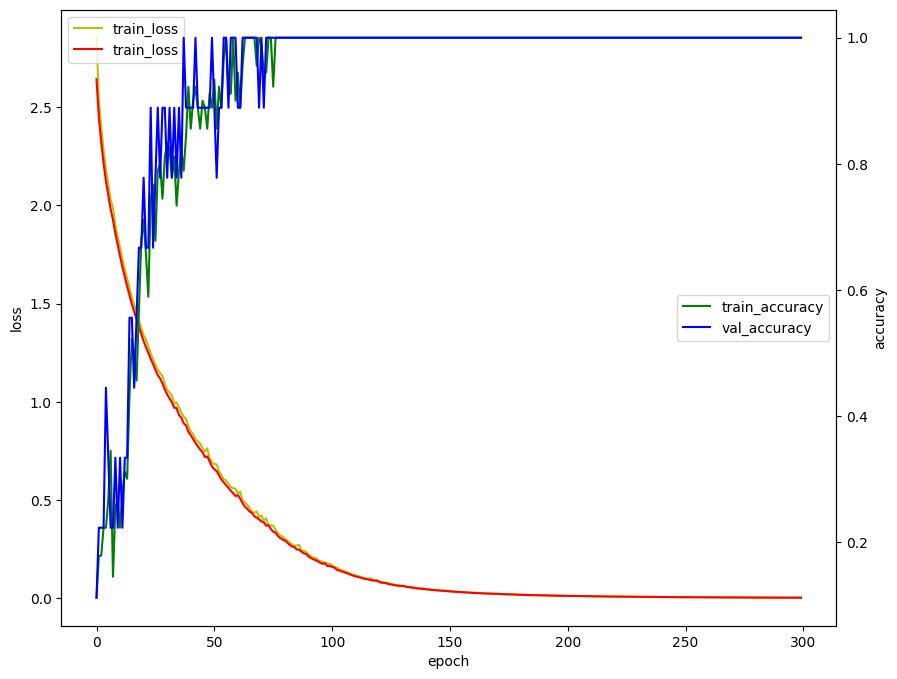

In [59]:
# 학습과정 표시하기
import matplotlib.pyplot as plt
fig, loss_ax = plt.subplots(figsize=(10,8))
loss_ax.plot(hist.history['loss'], 'y', label='train_loss')
loss_ax.plot(hist.history['val_loss'], 'r', label='train_loss')
acc_ax = loss_ax.twinx() # loss_ax와 x축을 공유하는 acc_ax 생성
acc_ax.plot(hist.history['accuracy'], 'g', label='train_accuracy')
acc_ax.plot(hist.history['val_accuracy'], 'b', label='val_accuracy')
loss_ax.set_xlabel('epoch')
loss_ax.set_ylabel('loss')
acc_ax.set_ylabel('accuracy')
loss_ax.legend(loc='upper left')
acc_ax.legend(loc='center right')
plt.show()

In [62]:
# 모델 평가하기(테스트데이터셋으로 모델 학습과정의 loss, metrics)
score = model.evaluate(x_val, Y_val, batch_size=3)
# print('loss & accuracy :', score)
print('loss :', score[0])
print('accuracy :', score[1])

3/3 [==============================] - 0s 2ms/step - loss: 0.0033 - accuracy: 1.0000
loss : 0.0032851924188435078
accuracy : 1.0


# 7. 모델 사용하기(모델을 이용해서 예측)

In [64]:
H = model.predict(np.array([2]))
H.argmax()

1/1 [==============================] - 0s 22ms/step


4

In [65]:
model.predict(np.array([2])).argmax()

1/1 [==============================] - 0s 17ms/step


4

In [68]:
# 몇%의 확률로 4라고 예측?
H[0,H.argmax()]*100

99.8559057712555

In [69]:
# % 2, 4, 6 의 확률
H[0, [2,4,6]]*100

array([6.377118e-02, 9.985590e+01, 8.032639e-02], dtype=float32)

# 7. 모델 저장

In [70]:
model.save('model/02_deep.h5')

In [71]:
# 저장된 모델 사용하기
model1 = load_model('model/02_deep.h5')

In [72]:
model1.predict(np.array([3])).argmax()

1/1 [==============================] - 0s 50ms/step


6